In [10]:
pip install transformers==4.30

In [1]:
import transformers

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
df_=pd.read_csv("Tweets (1).csv")

In [4]:
df=df_[['airline_sentiment','text']].copy()

<Axes: >

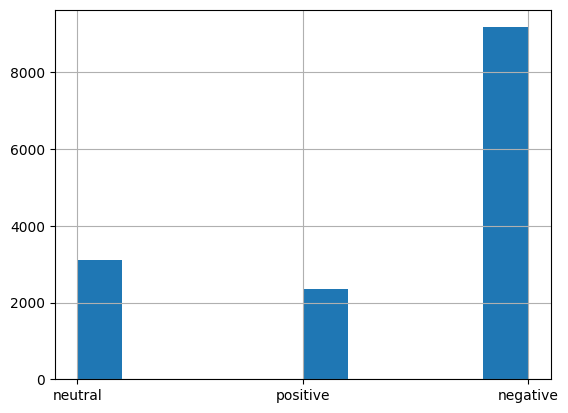

In [5]:
df['airline_sentiment'].hist()

In [6]:
target_map={'positive':1,'negative':0,'neutral':2}
df['target']=df['airline_sentiment'].map(target_map)

In [7]:
df2=df[['text','target']]
df2.columns=['sentence','label']
df2.to_csv('data.csv',index=None)

In [8]:
from datasets import load_dataset
raw_data=load_dataset('csv',data_files='data.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [9]:
split=raw_data['train'].train_test_split(test_size=0.3,seed=42)

In [10]:
split

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4392
    })
})

In [11]:
checkpoint='distilbert-base-cased'

In [12]:
from transformers import AutoTokenizer as at

In [13]:
tokenizer=at.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [14]:
def tokenize(data):
  return tokenizer(data['sentence'],truncation=True,padding=True)

In [15]:
tokenized_data=split.map(tokenize,batched=True)

Map:   0%|          | 0/10248 [00:00<?, ? examples/s]

Map:   0%|          | 0/4392 [00:00<?, ? examples/s]

In [16]:
from transformers import AutoModelForSequenceClassification,TrainingArguments,Trainer

In [17]:
model=AutoModelForSequenceClassification.from_pretrained(checkpoint,num_labels=3)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'classifier.weight', 'pre_classifier.weight

In [18]:
pip install torchinfo

In [19]:
from torchinfo import summary

In [39]:
pip install pytorch-accelerated

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.2
    Uninstalling tqdm-4.66.2:
      Successfully uninstalled tqdm-4.66.2
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.29.1
    Uninstalling accelerate-0.29.1:
      Successfully uninstalled accelerate-0.29.1


In [24]:
training_args=TrainingArguments(
    output_dir='training_dir',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=23,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64
)

In [25]:
def compute_metrics(logits_and_labels):
  logits,labels=logits_and_labels
  predictions=np.argmax(logits,axis=-1)
  acc=np.mean(predictions == labels)
  f1=f1_score(labels,predictions,average='macro')
  return {'accuracy':acc,'f1':f1}

In [26]:
trainer=Trainer(
    model,
    training_args,
    train_dataset=tokenized_data['train'],
    eval_dataset=tokenized_data['test'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [28]:
trainer.train()

Epoch,Training Loss,Validation Loss



KeyboardInterrupt



In [29]:
trainer.save_model("SentimentAnalysis")

In [31]:
!ls training_dir

checkpoint-1282  checkpoint-2564  checkpoint-3846  checkpoint-5128  runs
checkpoint-1923  checkpoint-3205  checkpoint-4487  checkpoint-641


In [30]:
from transformers import pipeline

In [43]:
split['test']['label']

[1,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 2,


In [33]:
model=pipeline('text-classification',model='training_dir/checkpoint-1282',device=0)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [36]:
test_pred=model(split['test']['sentences'])

In [37]:
test_pred

[{'label': 'LABEL_1', 'score': 0.9858343005180359},
 {'label': 'LABEL_1', 'score': 0.9939239621162415},
 {'label': 'LABEL_0', 'score': 0.9627772569656372},
 {'label': 'LABEL_1', 'score': 0.9482627511024475},
 {'label': 'LABEL_2', 'score': 0.9898235201835632},
 {'label': 'LABEL_0', 'score': 0.9980787038803101},
 {'label': 'LABEL_2', 'score': 0.9940124154090881},
 {'label': 'LABEL_2', 'score': 0.989941418170929},
 {'label': 'LABEL_2', 'score': 0.9651115536689758},
 {'label': 'LABEL_0', 'score': 0.9986213445663452},
 {'label': 'LABEL_0', 'score': 0.9977713823318481},
 {'label': 'LABEL_0', 'score': 0.9984387755393982},
 {'label': 'LABEL_1', 'score': 0.9917944073677063},
 {'label': 'LABEL_0', 'score': 0.9986183643341064},
 {'label': 'LABEL_2', 'score': 0.9973710775375366},
 {'label': 'LABEL_1', 'score': 0.8538079857826233},
 {'label': 'LABEL_0', 'score': 0.8018982410430908},
 {'label': 'LABEL_0', 'score': 0.9986911416053772},
 {'label': 'LABEL_0', 'score': 0.9915212392807007},
 {'label': 'L

In [41]:
def get_labels(pred):
 return(int(pred['label'].split('_')[1]))
test_predd=[get_labels(d) for d in test_pred]

In [44]:
print("accuracy: ",accuracy_score(split['test']['label'],test_predd))

accuracy:  0.8233151183970856
